In [61]:
import pandas as pd
import tensorflow
import numpy as np
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv("../Resources/cleaned_data.csv")
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


# Data Pre-Processing

Scale the data using LabelEncoder and MinMaxScaler

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

X = df.drop('koi_disposition',axis=1)
features = X.columns
y = df['koi_disposition']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify = y)
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [65]:
# Label-encode the data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [66]:
encoded_y_train

array([2, 2, 2, ..., 2, 2, 2])

In [67]:
y_train_categorical[-3]

array([0., 0., 1.], dtype=float32)

In [68]:
X_train.shape

(5243, 40)

In [69]:
y_train_categorical.shape

(5243, 3)

# Create a deep learning model



In [70]:
from tensorflow.keras.models import Sequential
model = Sequential()

from tensorflow.keras.layers import Dense
number_inputs = 40
number_hidden_nodes = 100
number_classes = 3
model.add(Dense(units=number_hidden_nodes,
               activation='relu',input_dim=number_inputs))
model.add(Dense(units=number_hidden_nodes,
                activation='relu'))
model.add(Dense(units=number_classes,
               activation='softmax'))

In [71]:
# compile and fit the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=['accuracy'])

history = model.fit(
    X_train_scaled,
    y_train_categorical,
    validation_data=(X_test_scaled, y_test_categorical),
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
164/164 - 0s - loss: 0.5489 - accuracy: 0.7307 - val_loss: 0.3759 - val_accuracy: 0.8101
Epoch 2/100
164/164 - 0s - loss: 0.3581 - accuracy: 0.8194 - val_loss: 0.3552 - val_accuracy: 0.8318
Epoch 3/100
164/164 - 0s - loss: 0.3416 - accuracy: 0.8339 - val_loss: 0.3468 - val_accuracy: 0.8284
Epoch 4/100
164/164 - 0s - loss: 0.3403 - accuracy: 0.8287 - val_loss: 0.3375 - val_accuracy: 0.8415
Epoch 5/100
164/164 - 0s - loss: 0.3312 - accuracy: 0.8388 - val_loss: 0.3337 - val_accuracy: 0.8461
Epoch 6/100
164/164 - 0s - loss: 0.3270 - accuracy: 0.8385 - val_loss: 0.3349 - val_accuracy: 0.8535
Epoch 7/100
164/164 - 0s - loss: 0.3187 - accuracy: 0.8474 - val_loss: 0.3249 - val_accuracy: 0.8495
Epoch 8/100
164/164 - 0s - loss: 0.3180 - accuracy: 0.8524 - val_loss: 0.3381 - val_accuracy: 0.8312
Epoch 9/100
164/164 - 0s - loss: 0.3108 - accuracy: 0.8493 - val_loss: 0.3165 - val_accuracy: 0.8707
Epoch 10/100
164/164 - 0s - loss: 0.3017 - accuracy: 0.8594 - val_loss: 0.3112 - val_accura

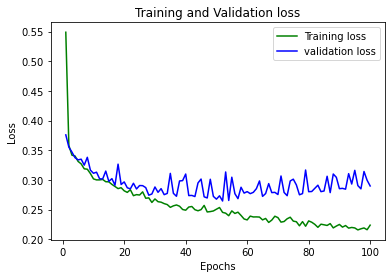

In [72]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

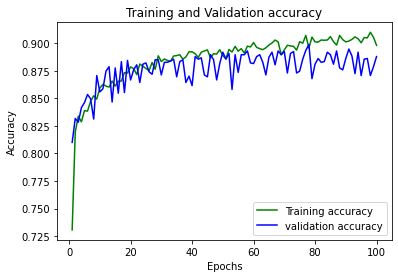

In [73]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Quantify the Trained Model

In [74]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}") # 88.79%

55/55 - 0s - loss: 0.2898 - accuracy: 0.8879
Loss: 0.2897880971431732, Accuracy: 0.8878718614578247


## Make Predictions

In [75]:
# Use the first 20 test data values to make a prediction and compare it to the actual labels
print(f"Actual Labels: {list(y_test[:20])}")

Actual Labels: ['CANDIDATE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'CANDIDATE', 'FALSE POSITIVE', 'CONFIRMED', 'FALSE POSITIVE', 'FALSE POSITIVE', 'CONFIRMED', 'CONFIRMED', 'FALSE POSITIVE', 'FALSE POSITIVE', 'CONFIRMED', 'FALSE POSITIVE', 'CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE']


In [76]:
predictions = model.predict_classes(X_test_scaled)
print(predictions)

[0 2 2 ... 0 1 2]


In [77]:
pred_classes = label_encoder.inverse_transform(predictions)
print(pred_classes)

['CANDIDATE' 'FALSE POSITIVE' 'FALSE POSITIVE' ... 'CANDIDATE' 'CONFIRMED'
 'FALSE POSITIVE']


In [80]:
prediction_df = pd.DataFrame({"Actual": y_test, "Predicted":pred_classes})
prediction_df.head()

,Actual,Predicted
1981,CANDIDATE,CANDIDATE
5609,FALSE POSITIVE,FALSE POSITIVE
532,FALSE POSITIVE,FALSE POSITIVE
6558,CANDIDATE,CANDIDATE
1249,FALSE POSITIVE,FALSE POSITIVE


In [83]:
prediction_df['match'] = np.where(prediction_df['Predicted'] == prediction_df['Actual'], 1, 0)
print(f"The number of total predictions: {len(prediction_df)}")
print(f"The number of correct predictions: {sum(prediction_df['match'])}")
print(f"The test test accuracy: {round(sum(prediction_df['match'])/len(prediction_df)*100,2)}%") # 87.59%
prediction_df[prediction_df['match']==0].index

The number of total predictions: 1748
The number of correct predictions: 1552
The test test accuracy: 88.79%


Int64Index([1687, 1143, 6093, 1455, 4197, 2580, 6451,  954, 5472, 1602,
            ...
            4063, 2827, 1769, 3787, 1400, 2258, 2932,  729, 3407, 1154],
           dtype='int64', length=196)

# Save the Model

In [84]:
model.save("deep_learning.h5")